In [1]:
import concurrent.futures
import pandas as pd 
import numpy as np 
import spacy
import os 
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import re 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder 

import fasttext

In [2]:
df = pd.read_csv('resume_df')
df.head()

,txt,lab,cleaned_txt,cleaned_lab,labeled_class
0,"Database Administrator <span class=""hl"">Databa...",Database_Administrator,database administrator database administrator ...,Database_Administrator,1
1,"Database Administrator <span class=""hl"">Databa...",Database_Administrator,database administrator sql server database adm...,Database_Administrator,1
2,Oracle Database Administrator Oracle <span cla...,Database_Administrator,oracle database administrator oracle oracle da...,Database_Administrator,1
3,Amazon Redshift Administrator and ETL Develope...,Database_Administrator,amazon redshift administrator etl developer bu...,Database_Administrator,1
4,Scrum Master Scrum Master Scrum Master Richmon...,Database_Administrator,scrum master scrum master scrum master richmon...,Database_Administrator,1


In [29]:
df['lab']

0                                   Database_Administrator
1                                   Database_Administrator
2                                   Database_Administrator
3                                   Database_Administrator
4                                   Database_Administrator
                               ...                        
29030    Java_Developer ,Web_Developer ,Software_Developer
29031                    Web_Developer ,Software_Developer
29032    Software_Developer ,Front_End_Developer ,Web_D...
29033                    Web_Developer ,Software_Developer
29034                    Software_Developer ,Web_Developer
Name: lab, Length: 29035, dtype: object

In [17]:
# !python -m spacy download en_core_web_sm

In [18]:
# NER = spacy.load("en_core_web_sm")
# doc = NER(df['txt'][0])
#     # Remove entities identified as locations (GPE: Geo-Political Entity)
# text = ' '.join([token.text for token in doc if token.ent_type_ != 'GPE'])

In [19]:
# for token in doc:
#     if token.ent_type_ == 'GPE':
#         print(token)
#         print(token.ent_type_)

In [5]:
def clean_txt(text):
    '''
    function to clean the text
    -- lowercasing the text, removing email ids and website links, stop words and special characters
    -- also it will do lemmitization of the words for better accuray of our model. 
    '''
    # Remove sentences that start with '<span' and end with 'span>'
    cleaned_text = re.sub(r'<span.*?span>', '', text.strip())

    cleaned_text = cleaned_text.lower()# Lowercasing

    cleaned_text = re.sub(r'http\S+|www\S+|https\S+', '', cleaned_text, flags=re.MULTILINE)# Removing hyperlinks

    cleaned_text = re.sub(r'\S+@\S+', '', cleaned_text, flags=re.MULTILINE)# Removing email addresses

    # Removing special characters, numbers, and punctuation
    cleaned_text = re.sub(r'[^a-zA-Z\s]', '', cleaned_text)

    # Tokenization
    tokens = word_tokenize(cleaned_text)

    # Removing stop words
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]

    return ' '.join(tokens)


In [6]:
df['no_lemm_cleaned_txt_without_labels'] = df['txt'].apply(clean_txt)

In [7]:
df['no_lemm_cleaned_txt_with_labels'] = '__label__' + df['cleaned_lab'] + ' ' + df['no_lemm_cleaned_txt'] 
df.head()

KeyError: 'no_lemm_cleaned_txt'

In [ ]:
train,test =train_test_split(df['no_lemm_cleaned_txt'],test_size= 0.2, random_state= 69)

In [ ]:
train

## Fasttext 

In [83]:
train.to_csv('resume_fasttext.train', header=False, index= False)
test.to_csv('resume_fasttext.test', header=False, index= False)

### Fasttext train_supervised

In [97]:
import fasttext 

fasttext_model = fasttext.train_supervised(input = 'resume_fasttext.train', epoch = 30)

Read 16M words
Number of words:  184282
Number of labels: 9
Progress: 100.0% words/sec/thread: 5571056 lr:  0.000000 avg.loss:  0.421716 ETA:   0h 0m 0s


In [89]:
fasttext_model.test('resume_fasttext.test')

(5807, 0.8079903564663338, 0.8079903564663338)

In [103]:
fasttext_model = fasttext.train_supervised(input = 'resume_fasttext.train', epoch = 100, wordNgrams=4 )

Read 16M words
Number of words:  184282
Number of labels: 9
Progress: 100.0% words/sec/thread: 1379273 lr:  0.000000 avg.loss:  0.199297 ETA:   0h 0m 0s


In [104]:
fasttext_model.test('resume_fasttext.test')

(5807, 0.8847942138798003, 0.8847942138798003)

In [124]:
# fasttext_model.save_model('fasttext_model')
# saving the model. 

In [107]:
fasttext_model_2 = fasttext.train_supervised(input = 'resume_fasttext.train', epoch = 200, wordNgrams= 10)

Read 16M words
Number of words:  184282
Number of labels: 9
Progress: 100.0% words/sec/thread:  454183 lr:  0.000000 avg.loss:  0.185802 ETA:   0h 0m 0s 0.067821 avg.loss:  0.493942 ETA:   0h 7m22s 0.329877 ETA:   0h 5m15s 0.317667 ETA:   0h 4m59s ETA:   0h 4m 4s


In [108]:
fasttext_model.test('resume_fasttext.test')

(5807, 0.8847942138798003, 0.8847942138798003)

In [149]:
text = '''EDUCATION
Northeastern University, Khoury College of Computer Sciences Boston, MA
Master of Science in Data Science – GPA: 4.0 Sep 2022 - May 2024(Expected)
Related courses: Supervised and Unsupervised Machine Learning, Introduction to Data Management and Processing, Algorithms
Ajeenkya DY Patil University Pune, India
Bachelor of Technology in Information Technology (Data Science) – GPA: 9.30/10.00 May 2022
Related courses: Data Structures and Algorithms, Statistics and Probability, DBMS, NoSQL Databases, ML,Data Visualization.
TECHNICAL SKILLS
Programming Python, R, C, SQL, HTML
Tools / Frameworks: Pandas, Numpy, scikit-learn, Flask, TensorFlow, Tableau, OpenCV, Git, Hadoop, PySpark, Seaborn,
Streamlit, Heroku
Databases MySQL, MongoDB, PostgreSQL
ML Algorithms: Supervised & Unsupervised learning, Clustering & Classification, NLP, Deep Learning
WORK EXPERIENCE
Skechers, Los Angeles, California June 2023 - August 2023
Data Science & Analytics Intern
• Developed a multi-channel attribution model using the Markov chain rule for marketing data on Databricks platform.
Implemented attribution rules to assign weights based on channel contributions to conversions.
• Gathered and preprocessed customer interaction data from various channels, ensuring data quality and consistency.
• Analyzed results to identify effective marketing channels and optimize strategies.
Faurecia, Pune, India September 2021 - May 2022
Data Science Intern
• Assisted in the development of machine learning algorithms to automate the process of measurement of inner car door panel
thickness, utilizing data sourced from CAD software.
• Performed data cleaning and feature engineering to enhance the quality of the dataset for model building. Employed data
visualization techniques for exploratory data analysis in Python.
• Developed effective models using tree-based algorithms (Random Forest and XGBoost), resulting in an MAE of
approximately 0.2. Adopted a new method that utilized 2D images of the data and Convolutional Neural Networks, leading to
a significant 50% improvement in MAE.
Scads Technologies, Pune, India February 2021 - May 2021
Data Analyst Intern
• Utilized Python and SQL to manipulate large datasets and uncover trends and patterns that could inform marketing strategies.
• Created BI dashboard in Power BI to analyze supermarket sales data and identify trends and opportunities for increased
profitability. Utilized Power BI to extract insights from a Facebook ad campaign and suggest ways to improve profitability by
discontinuing certain campaigns.
PROJECTS
Personal Project, California Hotspot Wildfire Prediction January 2022 - January 2022
• Developed a predictive model to identify potential hotspots for wildfires in California leveraging LightGBM algorithm.
Processed and analyzed satellite data to generate features for the model.
• Achieved an accuracy of 93% and a f1-score of 92% on test dataset, outperforming previous models. Deployed the model
using streamlit library.
Personal Project, Attendance System using Facial Recognition December 2022 - December 2022
• Developed a facial recognition algorithm using Deep Learning model and Extended Binary Patterns Histogram algorithm.
• The model built achieved high accuracy (>95%) for facial detection.
Northeastern University, Road Sign Detection November 2022 - December 2022
• Created a road sign detection system using Convolutional Neural Networks (CNN) for recognizing road signs. Trained the
model with a dataset of 50,000 images and attained an accuracy of 95%.
• Employed OpenCV for image pre-processing, Matplotlib for visualization, and TensorFlow for training CNN model.'''

text = clean_txt(text)

print(text)

education northeastern university khoury college computer sciences boston master science data science gpa sep may expected related courses supervised unsupervised machine learning introduction data management processing algorithms ajeenkya dy patil university pune india bachelor technology information technology data science gpa may related courses data structures algorithms statistics probability dbms nosql databases mldata visualization technical skills programming python r c sql html tools frameworks pandas numpy scikitlearn flask tensorflow tableau opencv git hadoop pyspark seaborn streamlit heroku databases mysql mongodb postgresql ml algorithms supervised unsupervised learning clustering classification nlp deep learning work experience skechers los angeles california june august data science analytics intern developed multichannel attribution model using markov chain rule marketing data databricks platform implemented attribution rules assign weights based channel contributions c

In [127]:
fasttext_model.predict(text)

(('__label__Python_Developer',), array([0.88108867]))

In [147]:
df['txt'][0].strip()

'Database Administrator <span class="hl">Database</span> <span class="hl">Administrator</span> Database Administrator - Family Private Care LLC Lawrenceville, GA A self-motivated Production SQL Server Database Administrator who possesses strong analytical and problem solving skills. My experience includes SQL Server 2005, 2008 and 2012, 2014, SSIS, as well as clustering, mirroring, and high availability solutions in OLTP environments. I am proficient in database backup, recovery, performance tuning, maintenance tasks, security, and consolidation. I am confident that I would make a beneficial addition to any company. Over the course of my career thus far, I have designed databases to fit a variety of needs, successfully ensured the security of those databases, problem-solved in order to meet both back-end and front-end needs, installed and tested new versions database management systems, customized and installed applications and meticulously monitored performance for the smoothest front

### Fasttext Word Embeddings
    Working with cleaned text i.e(all text processing and stop word removal)
    except text isn't lemmitized

In [160]:
df['no_lemm_cleaned_txt_without_labels'].to_csv('resume_fasttext_embeddings.txt', header=False, index= False)

In [13]:
df['cleaned_txt']

0        database administrator database administrator ...
1        database administrator sql server database adm...
2        oracle database administrator oracle oracle da...
3        amazon redshift administrator etl developer bu...
4        scrum master scrum master scrum master richmon...
                               ...                        
29030    servicenow developer servicenow servicenow dev...
29031    android developer android android developer hc...
29032    ui developer ui ui developer cotiviti health c...
29033    web developer los angeles ca work experience w...
29034    sr software engineer sr software engineer sr s...
Name: cleaned_txt, Length: 29035, dtype: object

In [15]:
fasttext_embeddings =fasttext.train_unsupervised('resume_fasttext_embeddings.txt', epoch = 10,dim = 50)

Read 20M words
Number of words:  46745
Number of labels: 0
Progress: 100.0% words/sec/thread:  166437 lr:  0.000000 avg.loss:  1.138276 ETA:   0h 0m 0s avg.loss:  1.841190 ETA:   0h 1m15s


In [168]:
fasttext_embeddings.words

['using',
 'data',
 'web',
 'experience',
 'application',
 'used',
 'development',
 'developed',
 'database',
 'management',
 'server',
 'project',
 'system',
 'software',
 'security',
 'sql',
 'services',
 'years',
 'systems',
 'design',
 'python',
 'developer',
 'support',
 'html',
 'javascript',
 'css',
 'business',
 'applications',
 'network',
 'java',
 'work',
 'worked',
 'team',
 'information',
 'new',
 'testing',
 'oracle',
 'skills',
 'environment',
 'implemented',
 'spring',
 'created',
 'user',
 'windows',
 'service',
 'jquery',
 'framework',
 'like',
 'technical',
 'involved',
 'various',
 'test',
 'code',
 'tools',
 'designed',
 'end',
 'xml',
 'servers',
 'based',
 'including',
 'issues',
 'requirements',
 'mysql',
 'manager',
 'analysis',
 'administrator',
 'ajax',
 'client',
 'responsible',
 'performance',
 'process',
 'responsibilities',
 'present',
 'developing',
 'ui',
 'access',
 'c',
 'technologies',
 'linux',
 'managed',
 'microsoft',
 'projects',
 'customer',
 'te

In [20]:
fasttext_embeddings.get_nearest_neighbors('python')

[(0.8706909418106079, 'django'),
 (0.8578535318374634, 'pythonzope'),
 (0.8468846082687378, 'pythonr'),
 (0.8405252695083618, 'pythonsql'),
 (0.8215827941894531, 'usedpython'),
 (0.8213180303573608, 'flask'),
 (0.817460834980011, 'pythonxx'),
 (0.8167125582695007, 'pythonusing'),
 (0.8153729438781738, 'djangotasty'),
 (0.8143796324729919, 'pythonui')]

In [180]:
fasttext_embeddings.get_word_vector('python').shape

(100,)

In [181]:
fasttext_embeddings.get_word_vector('nikhil')

array([-0.11841694,  0.00251289, -0.18797322, -0.02824611, -0.12439402,
        0.03823343,  0.03490164,  0.30208895,  0.2092921 ,  0.02387697,
       -0.1361955 ,  0.04145336,  0.16480707, -0.10956548,  0.24872775,
       -0.03500133, -0.19671924, -0.12656195, -0.18538976,  0.07284143,
       -0.2064975 ,  0.02058234, -0.13841984, -0.15905975,  0.17309552,
        0.16841993,  0.1813726 , -0.13907816,  0.07181233, -0.1045317 ,
        0.13362192,  0.34332004,  0.14159073,  0.0308621 ,  0.4604683 ,
       -0.06974063, -0.07335603,  0.02945566,  0.2907613 , -0.04809903,
       -0.18419552,  0.13182552,  0.24286188,  0.3027462 ,  0.17602538,
        0.05088642,  0.06618877,  0.25914332, -0.2206771 ,  0.03351273,
       -0.25254005,  0.31022793, -0.03806229,  0.16743307, -0.08991843,
       -0.04978978,  0.12773485,  0.20728111, -0.1556067 ,  0.04634518,
       -0.32477075,  0.17130068, -0.23144558, -0.1457063 , -0.4120804 ,
        0.33578914, -0.49939632,  0.03709019,  0.06643151, -0.20

In [189]:
#Saving the ebeddings model
#fasttext_embeddings.save_model('fasttext_embeddings.bin')

In [11]:
fasttext_embeddings_model = fasttext.load_model('fasttext_embeddings.bin')

In [190]:
#saving the dataframe for future purposes.
# df.to_csv('resume_cleaned_With&Without_labels.csv',index=False)

In [12]:
def get_embeddings(txt):
    txt_list = np.array(fasttext.tokenize(txt))

    z = [fasttext_embeddings_model.get_word_vector(token) for token in txt_list]

    return np.array(z)

In [13]:
embeddings_dic = {}
for row in range(df.shape[0]):
    embeddings_dic[row] = get_embeddings(df['no_lemm_cleaned_txt_without_labels'][row])

## we cacnnot convert the dictionary values into array bcoz of the varing length on the resumes. 

In [16]:
# to tackle this issue we will do the padding with zeros
resume_lengths = []
for values in embeddings_dic.values():
    resume_lengths.append(len(values))

print(max(resume_lengths))
resume_lengths = np.array(resume_lengths)

9493


<Axes: ylabel='Count'>

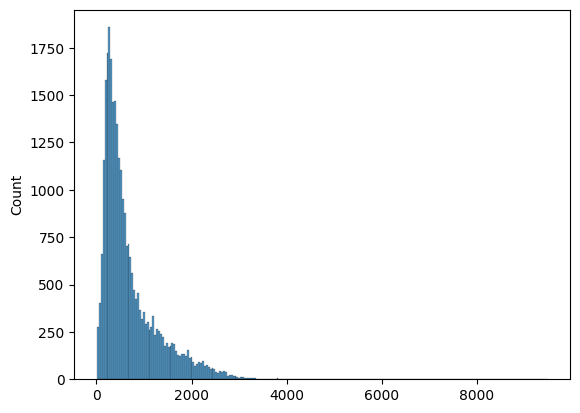

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns 

sns.histplot(resume_lengths)

<Axes: ylabel='Count'>

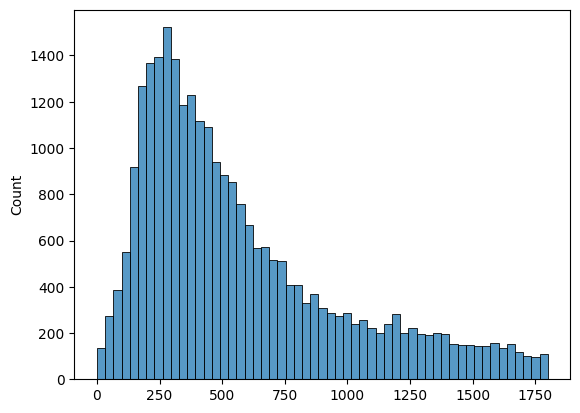

In [10]:
sns.histplot(resume_lengths, binrange=(0,1800))

In [17]:
np.where(resume_lengths< 1800)[0].shape

(27002,)

In [18]:
## removing those resume which have word count greater than 1800 words
resume_lengths_indx = np.where(resume_lengths< 1800)[0]

In [13]:
new_embeddings_dic = {}

for indx in resume_lengths_indx:
    if indx in embeddings_dic.keys():
        new_embeddings_dic[indx] = embeddings_dic[indx]

In [14]:
len(new_embeddings_dic)

27002

In [15]:
max_len = 0
for values in new_embeddings_dic.values():
    if len(values) > max_len:
        max_len = len(values)
print(max_len)

1799


In [16]:
for key in new_embeddings_dic.keys():
    len_difference = max_len - len(new_embeddings_dic[key])

    pad = np.zeros(shape = (len_difference,100)) #100 bcoz for the size of each word vector is 100

    new_embeddings_dic[key] = np.concatenate([new_embeddings_dic[key], pad])

In [17]:
embeddings = np.array(list(new_embeddings_dic.values()))

In [26]:
embeddings.shape

(27002, 1799, 100)

In [28]:
np.save('fasttext_embeddings_vec',embeddings)

In [38]:
df['labeled_class'][resume_lengths_indx]

0        1
1        1
2        1
3        1
4        1
        ..
29028    9
29029    9
29031    9
29033    9
29034    7
Name: labeled_class, Length: 27002, dtype: int64

In [20]:
#np.save('resume_lengths_indx',resume_lengths_indx)
#saving indexes 

## RNN & LSTM Model

In [3]:
embeddings = np.load('fasttext_embeddings_vec.npy')
df = pd.read_csv('resume_cleaned_With&Without_labels.csv')
resume_lengths_indx = np.load('resume_lengths_indx.npy')

In [1]:
import concurrent.futures
import pandas as pd 
import numpy as np 
import spacy
import os 
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import re 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder 

import fasttext

In [2]:
import os 
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'  

In [2]:
# from silence_tensorflow import silence_tensorflow
# silence_tensorflow()
import tensorflow as tf

import dask.array as da 
from keras.models import Sequential
from keras.layers import SimpleRNN, Dense, Input
import warnings 
warnings.filterwarnings('ignore')

In [3]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [4]:
if tf.test.is_gpu_available():
    print("GPU is available and TensorFlow is using it.")
else:
    print("GPU is not available. TensorFlow is using CPU.")

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.
GPU is available and TensorFlow is using it.


2023-12-01 19:41:53.519904: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M2 Pro
2023-12-01 19:41:53.519951: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2023-12-01 19:41:53.519961: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.33 GB
2023-12-01 19:41:53.520035: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-12-01 19:41:53.520066: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [1]:
import logging
logging.getLogger("tensorflow").setLevel(logging.ERROR)

In [15]:
x_train, x_test, y_train, y_test = train_test_split(embeddings, df['labeled_class'][resume_lengths_indx], test_size=0.3, random_state=42)

In [5]:
# np.save('x_train',x_train)
# np.save('x_test',x_test)
# np.save('y_train',y_train)
# np.save('y_test',y_test)

x_train = np.load('x_train.npy')
y_train = np.load('y_train.npy')
x_test = np.load('x_test.npy')
y_test = np.load('y_test.npy')

In [6]:
y_train = np.array(y_train).reshape(-1,1)
y_test =  np.array(y_test).reshape(-1,1)

In [7]:
x_train = da.from_array(x_train, chunks = (1000,1000,1000)) # text time try 100 from 3rd dimension
x_test = da.from_array(x_test, chunks = (1000,1000,1000))

In [8]:
x_train 

dask.array<array, shape=(18901, 1799, 100), dtype=float64, chunksize=(1000, 1000, 100), chunktype=numpy.ndarray>

In [3]:
# gpus = tf.config.list_physical_devices('GPU')
# if gpus:
#   # Restrict TensorFlow to only allocate 1GB of memory on the first GPU
#   try:
#     tf.config.set_logical_device_configuration(
#         gpus[0],
#         [tf.config.LogicalDeviceConfiguration(memory_limit=3072)])
#     logical_gpus = tf.config.list_logical_devices('GPU')
#     print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
#   except RuntimeError as e:
#     # Virtual devices must be set before GPUs have been initialized
#     print(e)

1 Physical GPUs, 1 Logical GPUs


2023-12-01 17:09:06.185082: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M2 Pro
2023-12-01 17:09:06.185122: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2023-12-01 17:09:06.185132: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.33 GB
2023-12-01 17:09:06.185187: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-12-01 17:09:06.185215: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [9]:
model = Sequential()
model.add(Input(shape=(1799,100)))
model.add(SimpleRNN(64, activation='relu'))
model.add(Dense(9, activation='softmax'))  

2023-12-01 19:43:17.276163: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-12-01 19:43:17.276792: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 64)                10560     
                                                                 
 dense (Dense)               (None, 9)                 585       
                                                                 
Total params: 11145 (43.54 KB)
Trainable params: 11145 (43.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [11]:
# Compile the model (adjust loss and metrics based on your task)
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(x_train, y_train, epochs=10, batch_size=32, verbose= 1,validation_data=(x_test, y_test))

Epoch 1/10


2023-12-01 19:43:18.190019: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


  1/591 [..............................] - ETA: 107:47:10 - loss: 2.1286 - accuracy: 0.0000e+00

KeyboardInterrupt: 

In [21]:
from sklearn.datasets import make_multilabel_classification
X, y = make_multilabel_classification(n_samples=1000, n_features=10, n_classes=3, n_labels=2, random_state=1)

In [27]:
y[0]

array([1, 1, 0])